In [1]:
import numpy as np
import pandas as pd

# Visualization
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from matplotlib.pyplot import pie, axis, show

import seaborn as sns # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
from datetime import datetime    # To access datetime


In [2]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
df = pd.read_csv('dataset_thonny_logs.csv') 

c:\users\alexf\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (21,24,25,26,27) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
def display_all(df):
    with pd.option_context("display.max_row", 100, "display.max_columns", 100):
        display(df)
display_all(df.head())

,view_id,view_class,sequence,time,student_ID,editor_id,editor_class,text_widget_id,text_widget_class,widget_id,widget_class,index,text,tags,trivial_for_coloring,trivial_for_parens,text_widget_context,index1,index2,error_type,filename,save_copy,cmd_line,command_text,input_text,widget,command_id,denied
0,ShellView,ShellView,ShowView,2020-03-23T14:33:24.525803,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AssistantView,AssistantView,ShowView,2020-03-23T14:33:24.543817,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,EditorTextCreated,2020-03-23T14:33:24.578842,1,75874928.0,Editor,75874448.0,CodeViewText,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NewFile,2020-03-23T14:33:24.579842,1,75874928.0,Editor,75874448.0,CodeViewText,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ShellView,ShellView,ShowView,2020-03-23T14:33:24.579842,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
student_ID,2236969.0,5.705124e+01,3.163410e+01,1.0,29.00,63.00,8.600000e+01,1.060000e+02
editor_id,26873.0,2.498610e+12,1.854013e+13,1598960.0,70105488.00,81174512.00,1.517544e+08,1.406988e+14
text_widget_id,1953485.0,2.546304e+12,1.871241e+13,1597616.0,70878544.00,80207152.00,1.694847e+08,1.406988e+14
widget_id,334764.0,1.543278e+12,1.462028e+13,1597616.0,56461008.00,74537168.00,1.163127e+08,1.406989e+14
index,1537730.0,1.022425e+03,1.744272e+03,1.0,9.17,37.17,1.430000e+03,6.981000e+03
index1,265869.0,4.963397e+01,2.528429e+02,1.0,5.90,13.15,3.411000e+01,6.812000e+03


# Information about Missing values


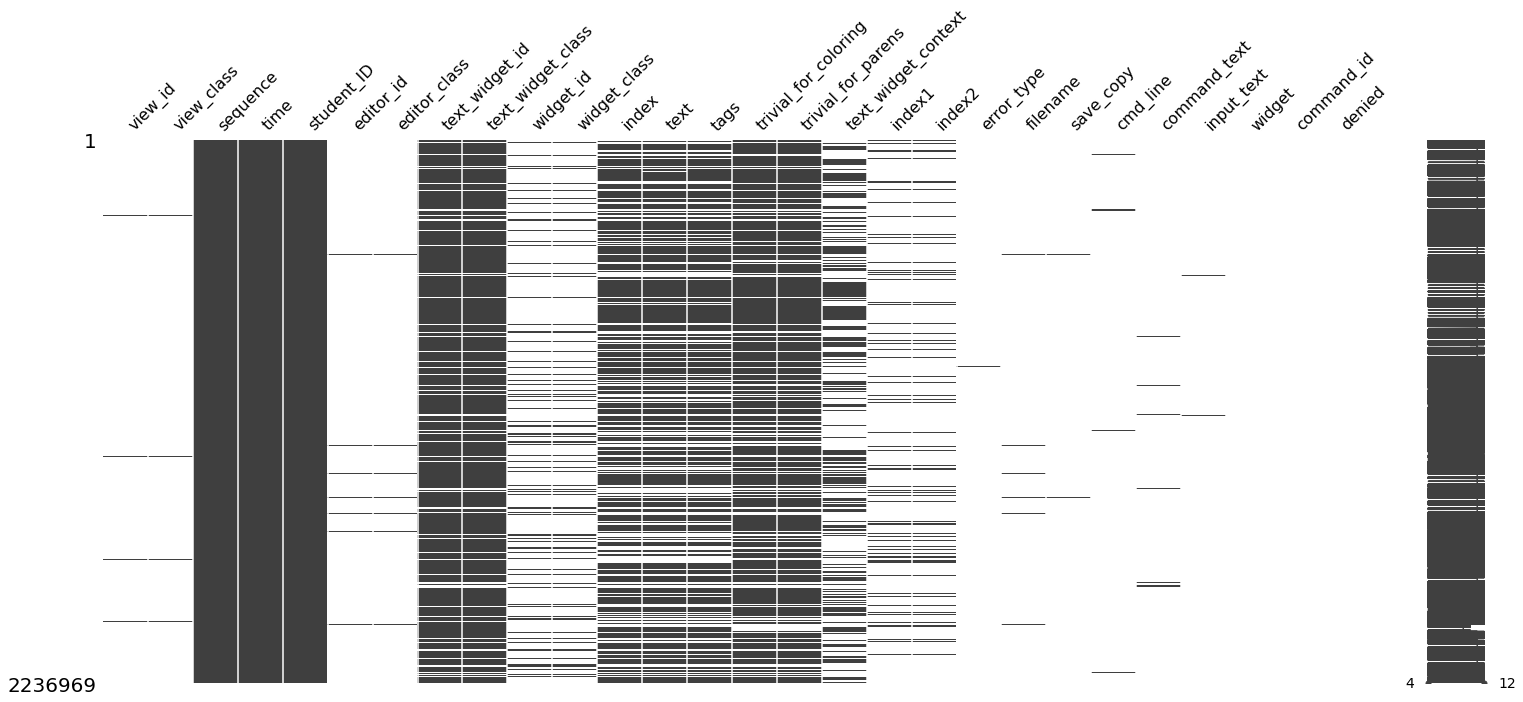

In [6]:
msno.matrix(df)
plt.show()

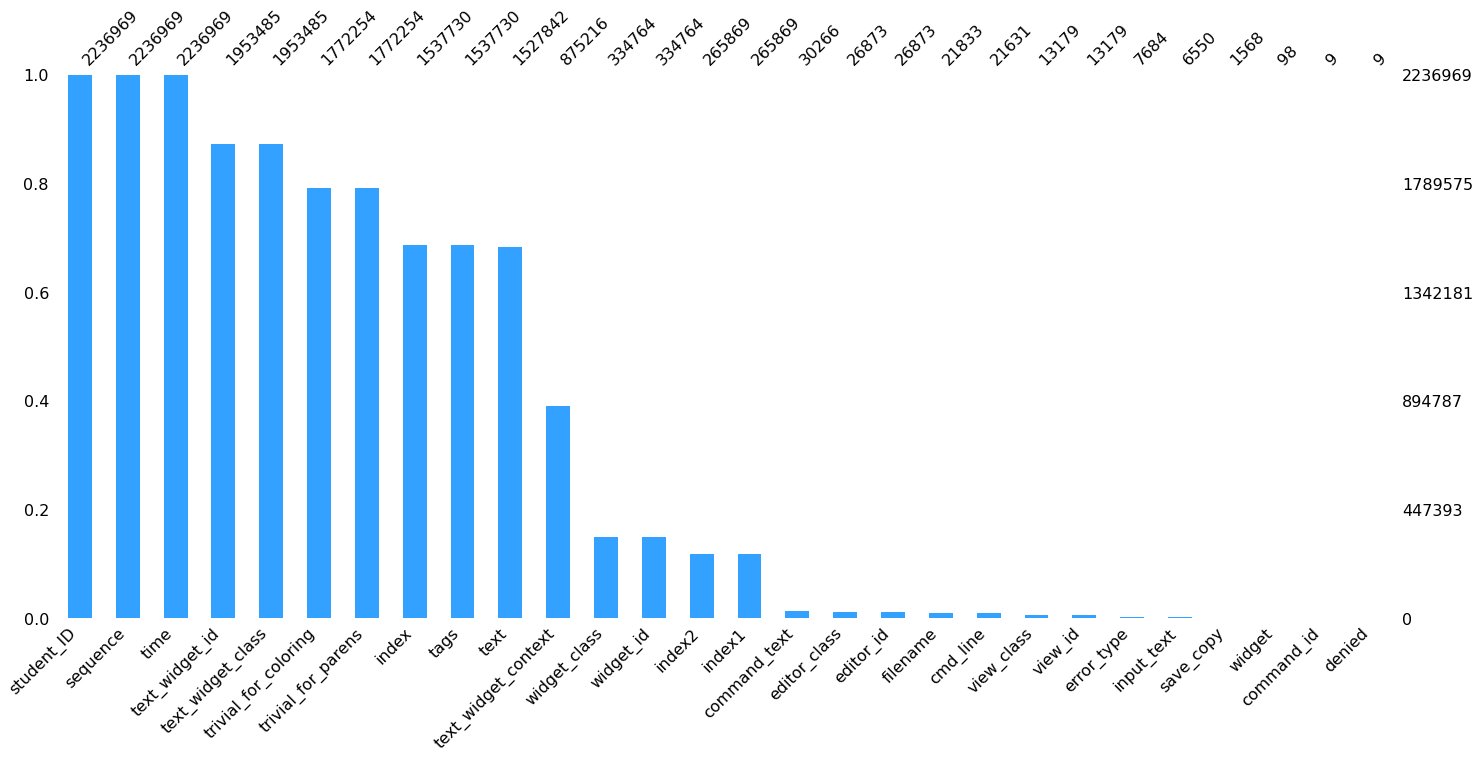

In [7]:
msno.bar(df,sort='descending',color='#33A1FF')
plt.show()

In [8]:
def Missing_Values(df):
    variable_name = []
    total_value = []
    total_missing_value = []
    missing_value_rate = []
    unique_value_list = []
    total_unique_value = []
    data_type = []
    
    for col in df.columns:
        variable_name.append(col)
        data_type.append(df[col].dtype)
        total_value.append(df[col].shape[0])
        total_missing_value.append(df[col].isnull().sum())
        missing_value_rate.append(round(df[col].isnull().sum()/df[col].shape[0],4))


        
    missing_data=pd.DataFrame({"Variable":variable_name,\
                               "Total_Value":total_value,\
                               "Total_Missing_Value":total_missing_value,\
                               "%_Missing_Value_Rate":missing_value_rate,\
                               "Data_Type":data_type\

                              })
    
    missing_data = missing_data.set_index("Variable")
    return missing_data.sort_values("Total_Missing_Value",ascending=False)

dataframe_info = Missing_Values(df)
dataframe_info

,Total_Value,Total_Missing_Value,%_Missing_Value_Rate,Data_Type
Variable,,,,
denied,2236969,2236960,1.0000,object
command_id,2236969,2236960,1.0000,object
widget,2236969,2236871,1.0000,object
save_copy,2236969,2235401,0.9993,object
input_text,2236969,2230419,0.9971,object
error_type,2236969,2229285,0.9966,object
view_class,2236969,2223790,0.9941,object
view_id,2236969,2223790,0.9941,object
cmd_line,2236969,2215338,0.9903,object


Heatmap

<AxesSubplot:>

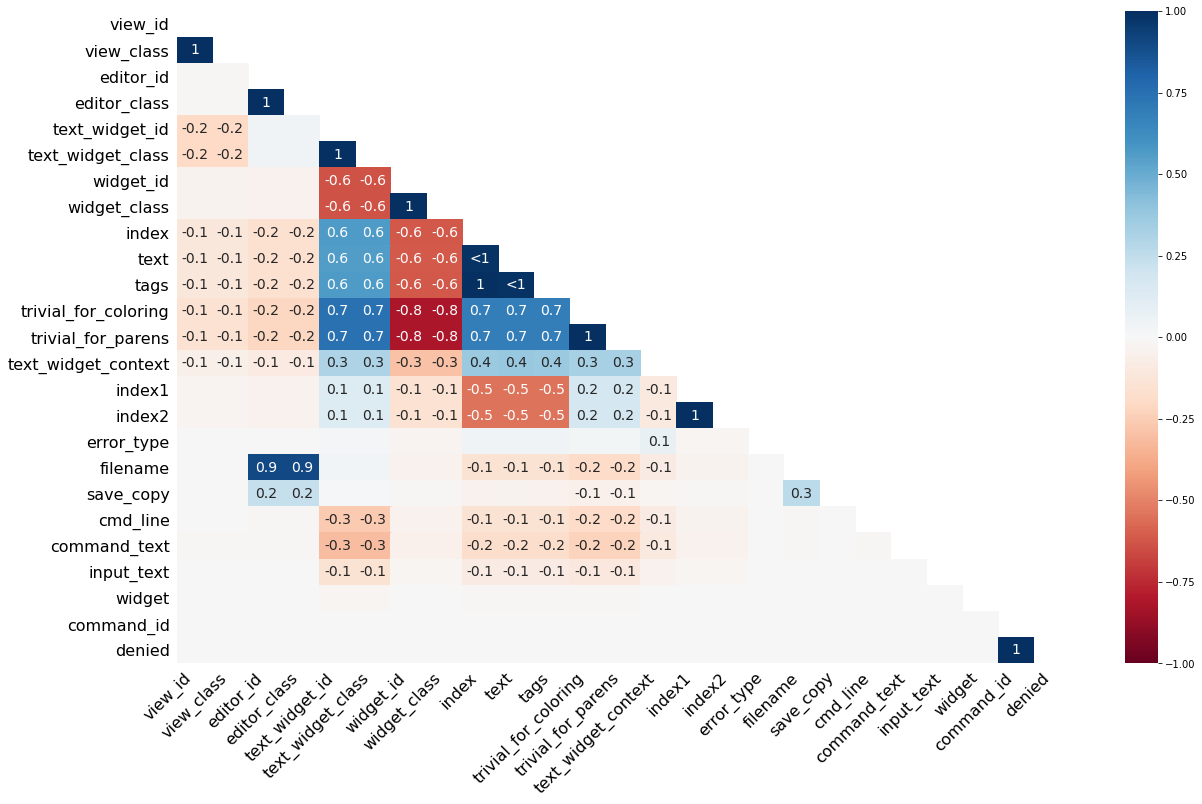

In [9]:
msno.heatmap(df) 

In [10]:
df.drop(columns=['denied','command_id', 'widget'])

,view_id,view_class,sequence,time,student_ID,editor_id,editor_class,text_widget_id,text_widget_class,widget_id,...,trivial_for_parens,text_widget_context,index1,index2,error_type,filename,save_copy,cmd_line,command_text,input_text
0,ShellView,ShellView,ShowView,2020-03-23T14:33:24.525803,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AssistantView,AssistantView,ShowView,2020-03-23T14:33:24.543817,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,EditorTextCreated,2020-03-23T14:33:24.578842,1,75874928.0,Editor,75874448.0,CodeViewText,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NewFile,2020-03-23T14:33:24.579842,1,75874928.0,Editor,75874448.0,CodeViewText,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ShellView,ShellView,ShowView,2020-03-23T14:33:24.579842,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236964,NaN,NaN,TextInsert,2020-05-14T15:59:38.295567,99,NaN,NaN,62161040.0,ShellText,NaN,...,False,shell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2236965,NaN,NaN,<FocusOut>,2020-05-14T15:59:39.585641,99,NaN,NaN,NaN,NaN,13183728.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2236966,NaN,NaN,<FocusIn>,2020-05-14T16:00:44.554357,99,NaN,NaN,NaN,NaN,13183728.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2236967,NaN,NaN,<Button-1>,2020-05-14T16:00:48.339574,99,NaN,NaN,NaN,NaN,62069616.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Timestamp


In [11]:
#
df['time'] = pd.to_datetime(df['time'])
#df['time'].dtypes

# Errors


In [12]:
df_errors = df[df['error_type'].notna()]
#df_errors = df[df['text'].str.contains("Error", na=False)]
display_all(df_errors.head())

,view_id,view_class,sequence,time,student_ID,editor_id,editor_class,text_widget_id,text_widget_class,widget_id,widget_class,index,text,tags,trivial_for_coloring,trivial_for_parens,text_widget_context,index1,index2,error_type,filename,save_copy,cmd_line,command_text,input_text,widget,command_id,denied
20,NaN,NaN,TextInsert,2020-03-23 14:33:52.646012,1,NaN,NaN,78015664.0,BaseShellText,NaN,NaN,4.0,ValueError: invalid literal for int() with bas...,"('io', 'stderr')",False,False,NaN,NaN,NaN,ValueError,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,TextInsert,2020-03-23 14:38:45.693829,1,NaN,NaN,54768912.0,ShellText,NaN,NaN,8.0,NameError: name 'forward' is not defined\n,"('io', 'stderr')",False,False,shell,NaN,NaN,NameError,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,NaN,NaN,TextInsert,2020-03-23 14:39:53.491679,1,NaN,NaN,54768912.0,ShellText,NaN,NaN,15.0,NameError: name 'forward' is not defined\n,"('io', 'stderr')",False,False,shell,NaN,NaN,NameError,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
170,NaN,NaN,TextInsert,2020-03-23 14:41:16.309866,1,NaN,NaN,54768912.0,ShellText,NaN,NaN,22.0,NameError: name 'forward' is not defined\n,"('io', 'stderr')",False,False,shell,NaN,NaN,NameError,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
189,NaN,NaN,TextInsert,2020-03-23 14:41:29.322084,1,NaN,NaN,54768912.0,ShellText,NaN,NaN,7.0,NameError: name 'forward' is not defined\n,"('io', 'stderr')",False,False,shell,NaN,NaN,NameError,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_errors.shape

(7684, 28)

Print number of errors during the laboratory lessons grouped by the months

Text(0, 0.5, 'Number of Errors')

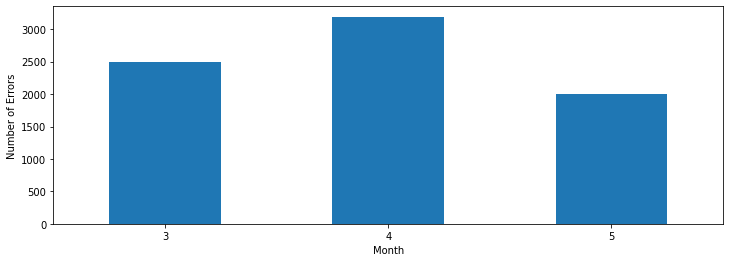

In [14]:
#as string
df_errors['error_type'].astype(str)


fig, axs = plt.subplots(figsize=(12, 4))
df_errors.groupby(df_errors["time"].dt.month)["error_type"].count().plot(kind='bar', rot=0, ax=axs)
plt.xlabel("Month")
plt.ylabel("Number of Errors")

Print number of errors during the laboratory lessons grouped by the days of the months

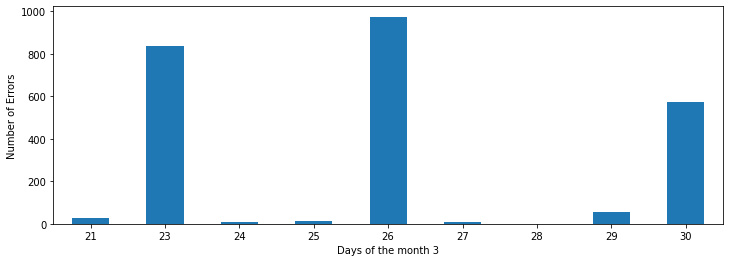

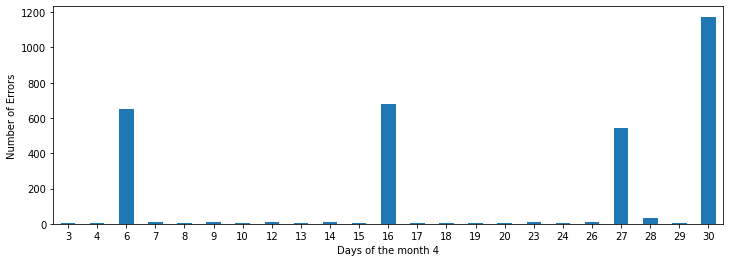

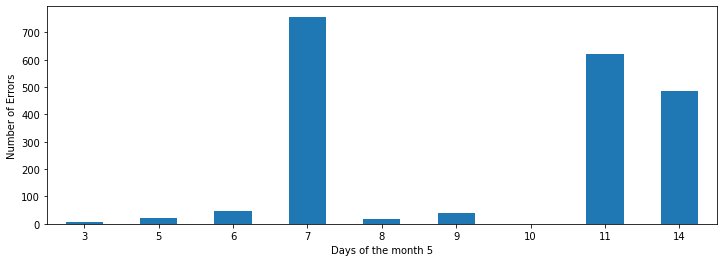

In [15]:
df_grouped_month = df_errors.groupby(df_errors["time"].dt.month)

for group_name, df_group in df_grouped_month:
    fig, axs = plt.subplots(figsize=(12, 4))
    df_group.groupby(df_group["time"].dt.day)["error_type"].count().plot(kind='bar', rot=0, ax=axs)
    plt.xlabel("Days of the month "+str(group_name))
    plt.ylabel("Number of Errors")



Pie charts 


Errors data cleaning

In [16]:
#df['prod_type'] = df['prod_type'].replace({'respon':'responsive', 'r':'responsive'})




df.drop(index=df[df['error_type'] == 'd={1'].index, inplace=True)
df.drop(index=df[df['error_type'] == 'Errore'].index, inplace=True)
df.drop(index=df[df['error_type'] == '    raise LookupError()'].index, inplace=True)
df.drop(index=df[df['error_type'] == 'def reverse_lookup(d, v)'].index, inplace=True)
df.drop(index=df[df['error_type'] == '## turtle.py'].index, inplace=True)

df.drop(index=df[df['error_type'] == "%Run 'Lab_07 RangeError.py'"].index, inplace=True)

df.drop(index=df[df['error_type'] == 'Help on built-in function remove'].index, inplace=True)
df.drop(index=df[df['error_type'] == 'Help on class list in module builtins'].index, inplace=True)
df.drop(index=df[df['error_type'] == 'Help on class range in module builtins'].index, inplace=True)
df.drop(index=df[df['error_type'] == 'Help on class str in module builtins'].index, inplace=True)



#df.drop(index=df[df['error_type'].str.contains("raise")].index, inplace=True)

#df.drop(df['error_type'].str.contains(r'[Lookup]').index)


new_df_errors = df[df['error_type'].notna()]

In [17]:
new_df_errors.groupby(['error_type']).groups.keys()


dict_keys(['AssertionError', 'AttributeError', 'FileNotFoundError', 'ImportError', 'IndentationError', 'IndexError', 'KeyError', 'LookupError', 'MemoryError', 'ModuleNotFoundError', 'NameError', 'RecursionError', 'SyntaxError', 'TabError', 'TypeError', 'UnboundLocalError', 'ValueError', 'ZeroDivisionError', '_tkinter.TclError', 'turtle.TurtleGraphicsError'])

Text(0, 0.5, 'Error type')

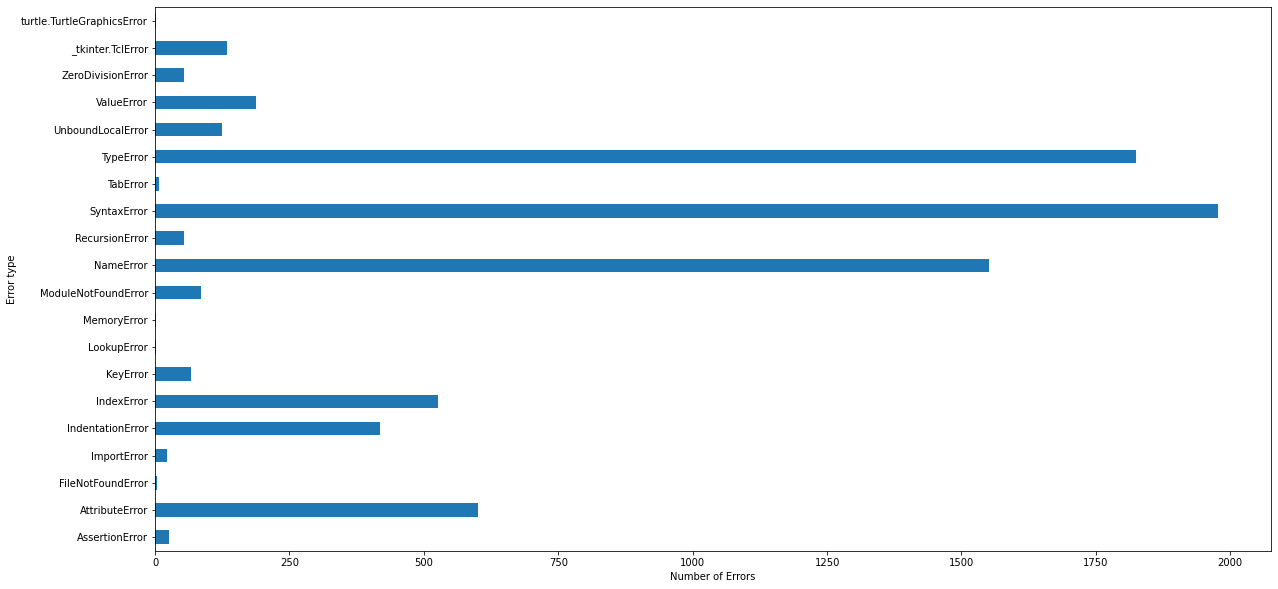

In [18]:
plt.figure(figsize=(20, 10))
new_df_errors.groupby(['error_type'])['error_type'].count().plot(kind='barh') 
plt.xlabel("Number of Errors")
plt.ylabel("Error type")

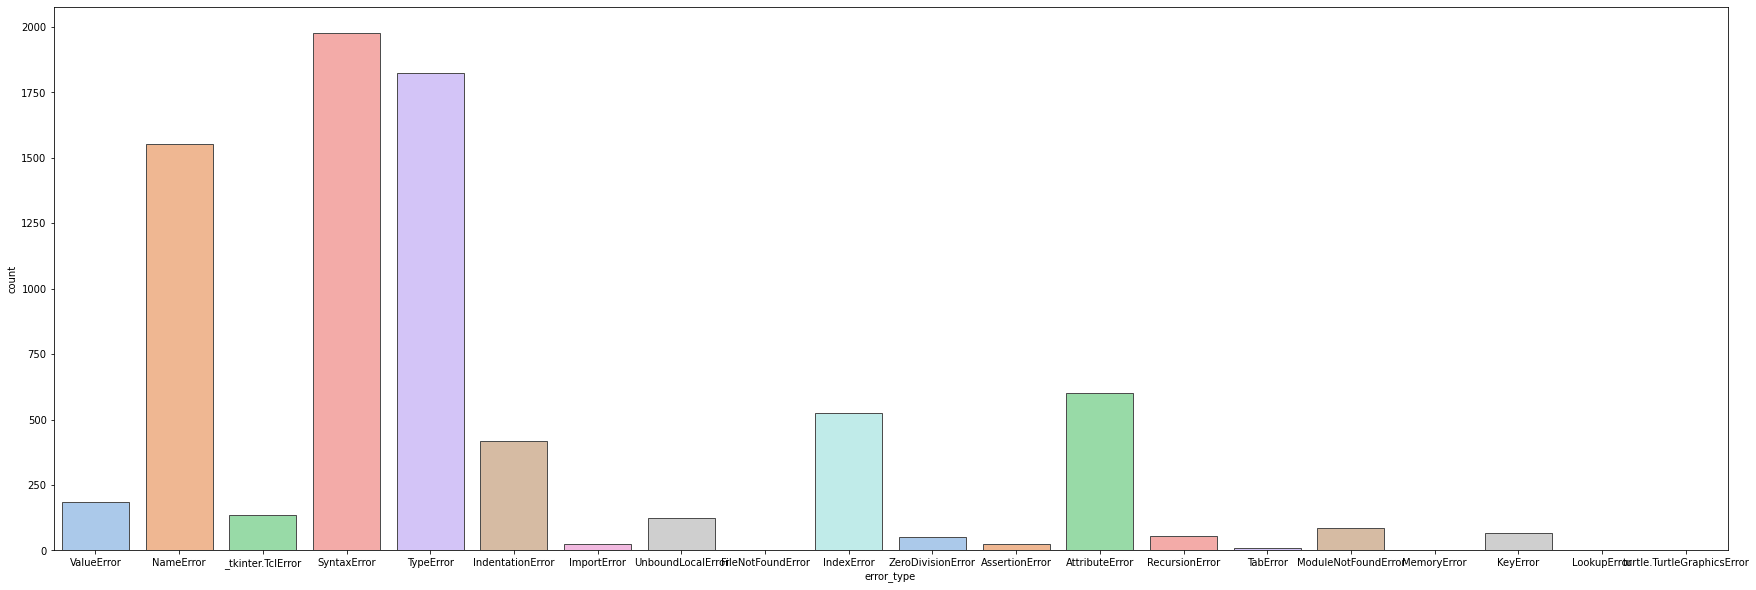

In [19]:
plt.figure(figsize=(30, 10))
sns.countplot(x=new_df_errors['error_type'], data=new_df_errors, palette="pastel", edgecolor=".3")

plt.show()

Mean of errors per student

In [20]:
#Mean of errors per student
new_df_errors.groupby(['student_ID'])['error_type'].count().mean()

82.39784946236558

# Numer of Run

In [21]:
#df with Run 

df_command_text= df[df['command_text'].notna()]

df_run = df_command_text[df_command_text['command_text'].str.contains("%Run")]

#df_run.groupby(['student_ID'])['command_text'].count()

In [30]:
df_run

,view_id,view_class,sequence,time,student_ID,editor_id,editor_class,text_widget_id,text_widget_class,widget_id,...,index2,error_type,filename,save_copy,cmd_line,command_text,input_text,widget,command_id,denied
90,NaN,NaN,ShellCommand,2020-03-23 14:38:44.843547,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,%Run turtle.py\n,NaN,NaN,NaN,NaN
126,NaN,NaN,ShellCommand,2020-03-23 14:39:53.154439,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,%Run turtle.py\n,NaN,NaN,NaN,NaN
159,NaN,NaN,ShellCommand,2020-03-23 14:41:15.973628,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,%Run tartaruga.py\n,NaN,NaN,NaN,NaN
178,NaN,NaN,ShellCommand,2020-03-23 14:41:28.986765,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,%Run tartaruga.py\n,NaN,NaN,NaN,NaN
246,NaN,NaN,ShellCommand,2020-03-23 14:42:48.519844,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,%Run tarta.py\n,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2236463,NaN,NaN,ShellCommand,2020-05-14 15:55:45.011224,99,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,%Run Lab14_1.py\n,NaN,NaN,NaN,NaN
2236558,NaN,NaN,ShellCommand,2020-05-14 15:56:25.143520,99,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,%Run Lab14_1.py\n,NaN,NaN,NaN,NaN
2236567,NaN,NaN,ShellCommand,2020-05-14 15:56:28.485711,99,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,%Run Lab14_1.py\n,NaN,NaN,NaN,NaN
2236918,NaN,NaN,ShellCommand,2020-05-14 15:59:20.885571,99,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,%Run Lab14_1.py\n,NaN,NaN,NaN,NaN


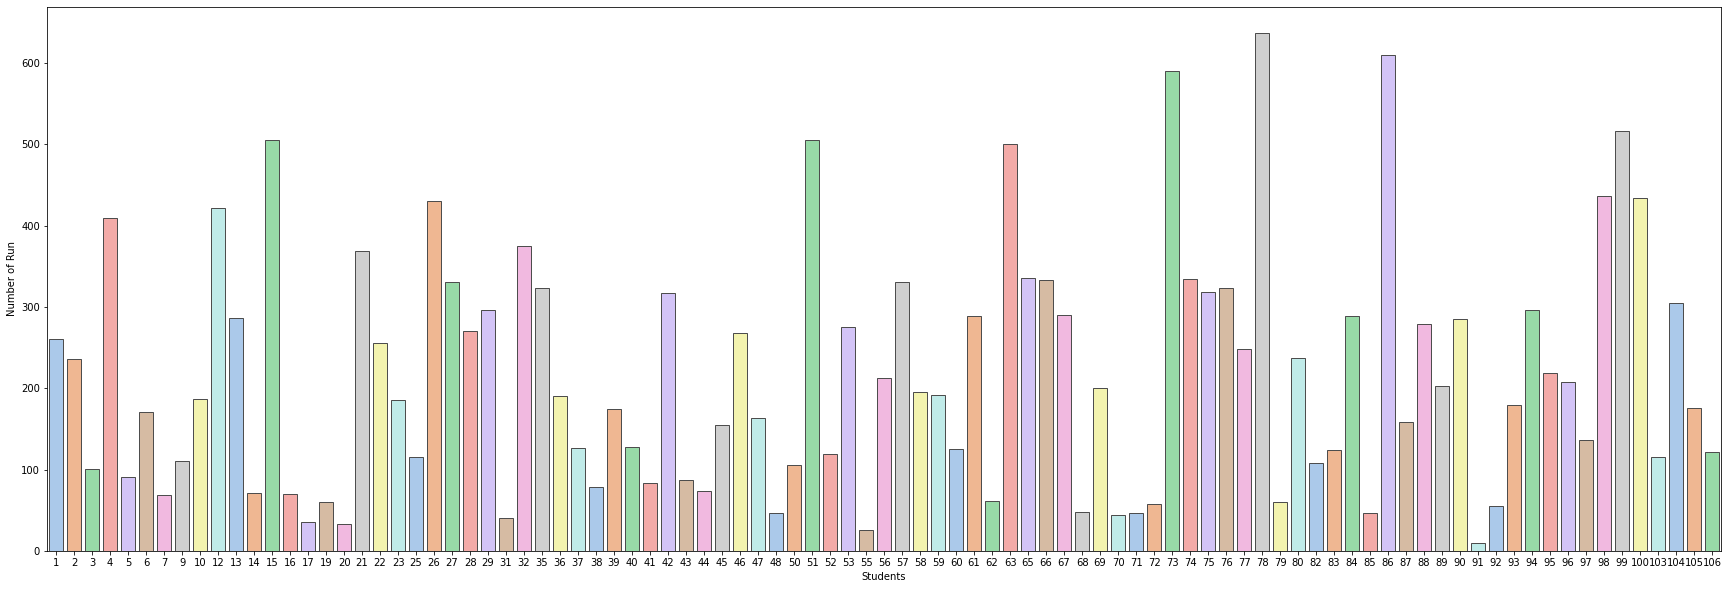

In [22]:
plt.figure(figsize=(30, 10))
sns.countplot('student_ID', data=df_run, palette="pastel", edgecolor=".3")

plt.xlabel("Students")
plt.ylabel("Number of Run")
plt.show()

Mean of run per student

In [23]:
#Mean of run per student
df_run.groupby(['student_ID'])['command_text'].count().mean()

218.89247311827958

# Pasted text


In [24]:
df_sequence_paste= df[df['sequence'].notna()]

df_paste = df_sequence_paste[df_sequence_paste['sequence'].str.contains("<<Paste>>")]

In [27]:

df_paste

,view_id,view_class,sequence,time,student_ID,editor_id,editor_class,text_widget_id,text_widget_class,widget_id,...,index2,error_type,filename,save_copy,cmd_line,command_text,input_text,widget,command_id,denied
2104,NaN,NaN,<<Paste>>,2020-03-23 15:27:13.480797,1,NaN,NaN,54768912.0,ShellText,54768912.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2298,NaN,NaN,<<Paste>>,2020-03-23 15:30:17.190550,1,NaN,NaN,54768912.0,ShellText,54768912.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3516,NaN,NaN,<<Paste>>,2020-03-23 16:29:17.360904,1,NaN,NaN,64777680.0,ShellText,64777680.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3804,NaN,NaN,<<Paste>>,2020-03-23 16:35:07.833767,1,NaN,NaN,64777680.0,ShellText,64777680.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3949,NaN,NaN,<<Paste>>,2020-03-23 16:41:10.629713,1,NaN,NaN,64777680.0,ShellText,64777680.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235128,NaN,NaN,<<Paste>>,2020-05-14 15:29:52.944451,99,NaN,NaN,63131248.0,CodeViewText,63131248.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2235327,NaN,NaN,<<Paste>>,2020-05-14 15:32:19.641842,99,NaN,NaN,63131248.0,CodeViewText,63131248.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2235765,NaN,NaN,<<Paste>>,2020-05-14 15:41:02.653756,99,NaN,NaN,63131248.0,CodeViewText,63131248.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2236391,NaN,NaN,<<Paste>>,2020-05-14 15:53:15.062648,99,NaN,NaN,63131248.0,CodeViewText,63131248.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


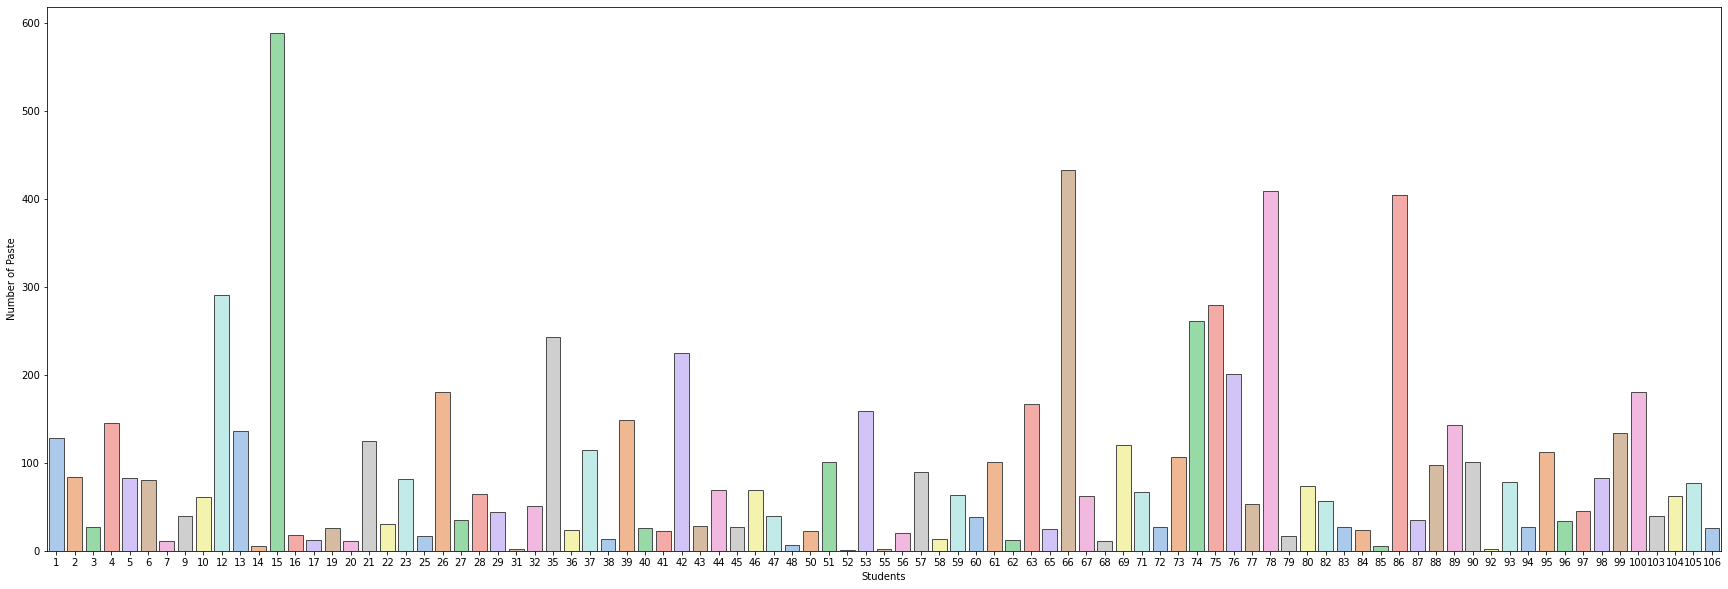

In [28]:
plt.figure(figsize=(30, 10))
sns.countplot('student_ID', data=df_paste, palette="pastel", edgecolor=".3")

plt.xlabel("Students")
plt.ylabel("Number of Paste")
plt.show()

Mean of text pasted per student

In [29]:
df_run.groupby(['student_ID'])['sequence'].count().mean()

218.89247311827958